# <font style="color:black">Lecture 1: Homework Problem</font>

In this first homework set, I want you to make sure that you can use GitHub, MS Code, and OpenCV.
You should (already to be able to read this document), clone the Github classroom assignment and edit it in VS Code.  In this python notebook, do the following:

* Load an (Grayscale) image  (‘Data/Apollo_11_Launch.jpg’)
* View image
* Crop image
* Edit brightness of image
* Rotate image
* Save modified image

In [ ]:
conda install -c conda-forge matplotlib -y # install matplotlib if you don't have it yet


^C


3 channel Terms of Service accepted
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c defaults conda




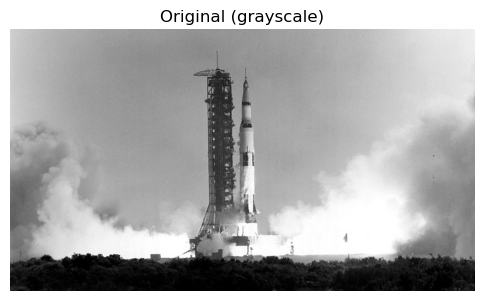

(720, 1280)

In [4]:
import cv2, matplotlib.pyplot as plt # Import OpenCV for image processing, matplotlib for displaying images, and pathlib for file paths
from pathlib import Path

img_path = Path("Data/Apollo_11_Launch.jpg")  # Define the path to the image (inside the Data folder in your repo)

img_gray = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE) # Load the image in grayscale mode (cv2.IMREAD_GRAYSCALE converts color to black & white intensity values)

assert img_gray is not None, f"Couldn't load {img_path}" # Safety check: make sure the image actually loaded

plt.figure(figsize=(6,6))# Display the grayscale image using matplotlib

plt.imshow(img_gray, cmap="gray") # 'cmap="gray"' ensures grayscale visualization

plt.axis("off") # removes x/y axis ticks for a cleaner look

plt.title("Original (grayscale)"); plt.show()

img_gray.shape # Show the dimensions of the image (height, width)


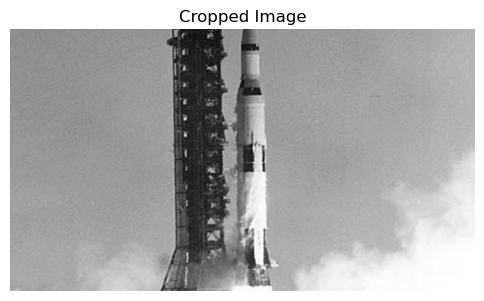

(360, 640)

In [ ]:
# Get the height (h) and width (w) of the image
h, w = img_gray.shape

# Define crop boundaries: here we crop the central 50% of the image
y1, y2 = int(0.25*h), int(0.75*h)   # vertical crop range
x1, x2 = int(0.25*w), int(0.75*w)   # horizontal crop range

# Apply the crop using array slicing
crop = img_gray[y1:y2, x1:x2]

# Display the cropped image
plt.figure(figsize=(6,6))
plt.imshow(crop, cmap="gray")
plt.axis("off")
plt.title("Cropped Image")
plt.show()

# Output the new shape to confirm it’s smaller than the original
crop.shape


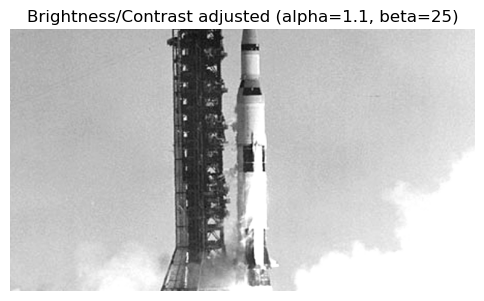

In [7]:
# Adjust brightness and contrast using cv2.convertScaleAbs
# alpha = contrast (1.0 = no change, >1 = higher contrast, <1 = lower contrast)
# beta = brightness (positive values make the image brighter, negative make it darker)
alpha, beta = 1.1, 25   # tweak these values to experiment

bright = cv2.convertScaleAbs(crop, alpha=alpha, beta=beta)

# Display the adjusted image
plt.figure(figsize=(6,6))
plt.imshow(bright, cmap="gray")
plt.axis("off")
plt.title(f"Brightness/Contrast adjusted (alpha={alpha}, beta={beta})")
plt.show()


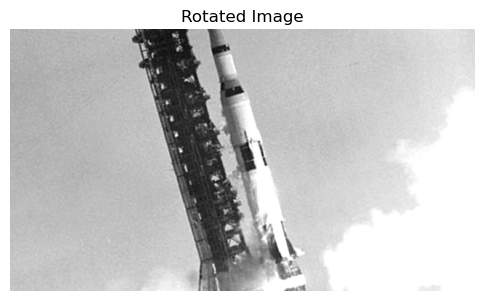

In [8]:
# Get dimensions of the brightness-adjusted image
h2, w2 = bright.shape

# Define the center of rotation (middle of the image)
center = (w2//2, h2//2)

# Create a 2D rotation matrix: rotate 15 degrees counter-clockwise
M = cv2.getRotationMatrix2D(center, 15, 1.0)   # last param = scale (1.0 = keep size)

# Apply the rotation using warpAffine
# borderMode=cv2.BORDER_REFLECT fills empty edges naturally instead of black borders
rotated = cv2.warpAffine(bright, M, (w2, h2), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)

# Display the rotated image
plt.figure(figsize=(6,6))
plt.imshow(rotated, cmap="gray")
plt.axis("off")
plt.title("Rotated Image")
plt.show()


In [9]:
# Define the output path for the modified image
out_path = Path("Data") / "apollo11_modified.png"

# Save the final rotated image to disk in the Data folder
cv2.imwrite(str(out_path), rotated)

# Print the full path to confirm where it was saved
out_path.resolve()


WindowsPath('C:/Users/tomas/OneDrive/School/PITT/ECE2390/verifying-setup-tomaskaiser605-cmyk/Data/apollo11_modified.png')